## Facultad de Ingeniería
## Universidad Nacional Autónoma de México
### Ingeniería Geofísica

### Geofísica Matemática y Computacional
####   Profesor: Luis Miguel de la Cruz Salas



Examen parcial 2

Hernández Terán Oscar

Entrega: Ma 15-Dic-2020

In [17]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('Solarize_Light2')

Resolver la ecuaciòn de onda:

$\frac{\partial^2 u}{\partial t^2}(x,t) - \alpha^2\frac{\partial^2 u}{\partial x^2}(x,t) = 0 $

$0<x<L; t>0$

$u(0,t) = u(l,t) = 0$ para $t>0$

$u(x,0) = f(x)$ y $\frac{\partial u}{\partial t}(x,0) = g(x)$ para $0 \leq x \leq L$ 

In [68]:
def f(x):
    """
    Esta función devuelve las condiciones iniciales del problema.
    Parámetros:
    ------------------------------
    Entrada:
        Float. x
        Coordenadas de la malla.
    Salida:
        Vector que contiene las condiciones iniciales.
    """
    return np . sin ( np . pi * x)

def g(x ):
    """
    Esta función devuelve la velocidad inicial de la cuerda.
    Parámetros:
    ------------------------------
    Entrada:
        Float. x
        Coordenadas de la malla.
    Salida:
        Velocidad inicial.
    """
    return 0

def solExacta (x , t ):
    """
    Esta función genera la solución exacta de la ecuación de onda
    Parámetros:
    ------------------------------
    Entrada:
        Float. x
        Coordenadas de la malla.
        Float. t
        Vector de tiempo del problema.
    Salida:
        Devuelve la solución exacta del problema.
    """
    return np.sin(np.pi * x) * np.cos(2 * np.pi * t)

def calcError ( sol_n , sol_e ):
    """
    Esta función calcula el error existente entre las soluciones.
    Parámetros:
    ------------------------------
    Entrada:
        Float. sol_n
        Solución numérica.
        Float. sol_e
        Solución exacta.
    Salida:
        Float.
        Retorna el valor absoluto de la diferencia de las soluciones.
    """
    return np . abs ( sol_n - sol_e )

def condicionesIniciales (l , ht , u , x , op =1):
    """
    Esta función genera un vector que contiene la posición a partir de las condiciones iniciales.
    Parámetros:
    ------------------------------
    Entrada:
        Float. l
            Lambda. Condición inicial.
        Float. ht
            Tamaño de paso en el tiempo.
        Float. u
            Condición inicial.
        Float. x
            Coordenadas de la malla.
        Int. op
            Elección de método numérico.
    Salida:
        Float. w
            Posiciones de la cuerda.
    """
    N = len (u)
    w = np . zeros (N )
    for i in range (1 ,N -1):
        if op == 1:
            w[i ] = u[ i] + ht * g(x [i ])
        else :
            w[i ] = (1 - l **2) * u[ i] + 0.5 * l **2 * (u [i +1] + u[i -1]) + ht * g (x[i ])
    return w

def solver (u , w , N , x , Nt , l ):
    """
    Esta función genera la solución numérica a la ecuación.
    Parámetros:
    ------------------------------
    Entrada:
        Float. u
            Condición inicial.
        Float. w
            Posiciones iniciales.
        Int. N
            Número de incognitas internas
        Float. x
            Coordenadas de la malla.
        Float. Nt
            Número total de pasos.
        Float. l
            Lambda. Condición inicial.        
    Salida:
        Float. s
            Solución de la ecuación.
    """
    s = np . zeros (N+2)
    for n in range (1 , Nt+2):
        for i in range (1 , N-1):
            s[i] = 2 * (1 - l **2) * w[i] + l **2 * (w[i +1] + w [i -1]) - u[ i]
        u = w.copy ()
        w = s.copy ()
    return s

In [69]:
L = 1 # Longitud del dominio
N = 20 # Numero de incognitas internas
Tmax = 1.0 # Tiempo maximo de simulacion
ht = 0.05 # Paso de tiempo
alpha = 2 # Dato fisico
h = L / (N +1) # Tamanio de la malla espacial
Nt = 20 # Numero total de pasos
lamb = alpha * ht / h # Parametro lambda
Tmax = Nt * ht # Tiemp0

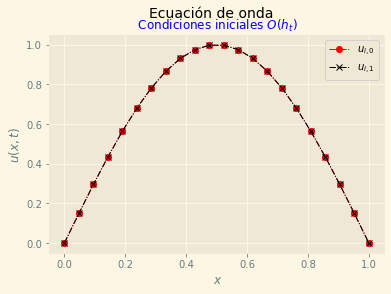

In [70]:
x = np .linspace(0 ,L ,N +2) # Coordenadas de la malla
u = f(x) # Condicion inicial
w = condicionesIniciales(lamb, ht, u, x, op=1) # Euler :op = 1
plt.suptitle( 'Ecuación de onda', fontsize=14)
plt.plot(x , u , 'ro-.', lw = 1 , label = "$u_{i ,0}$")
plt.plot(x , w , 'kx-.', lw = 1 , label = "$u_{i ,1}$")
plt.title( ' Condiciones iniciales $O(h_t)$ ', color = 'blue' , fontsize=12)
plt.ylabel( '$u (x ,t) $ ')
plt.xlabel( ' $x$ ')
plt.legend()
#plt.savefig( ' condicion_O3 .pdf ')
plt.show()

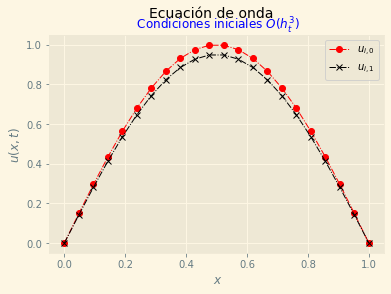

In [71]:
x = np .linspace(0 ,L ,N +2) # Coordenadas de la malla
u = f(x) # Condicion inicial
w = condicionesIniciales(lamb, ht, u, x, op=2) # Euler :op = 1
plt.suptitle( 'Ecuación de onda', fontsize=14)
plt.plot(x , u , 'ro-.', lw = 1 , label = "$u_{i ,0}$")
plt.plot(x , w , 'kx-.', lw = 1 , label = "$u_{i ,1}$")
plt.title( ' Condiciones iniciales $O(h_t^3)$ ', color = 'blue' , fontsize=12)
plt.ylabel( '$u (x ,t) $ ')
plt.xlabel( ' $x$ ')
plt.legend()
#plt.savefig( ' condicion_O3 .pdf ')
plt.show()

In [72]:
x = np .linspace(0 ,L ,N+2) # Coordenadas de la malla
u = f(x) # Condicion inicial
t = np.linspace(0,Tmax,Nt+2)
w = condicionesIniciales( lamb , ht , u , x , op = 1) # Euler :op = 1
s = solver (u , w , N , x , Nt , lamb )
Exa = solExacta(x,t)

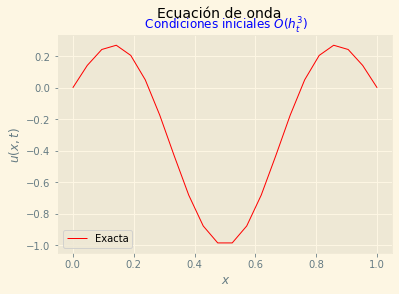

In [75]:
plt.suptitle( 'Ecuación de onda', fontsize=14)
#plt.plot(x , u , 'ro-.', lw = 1 , label = "$u_{i ,0}$")
#plt.plot(x , w , 'kx-.', lw = 1 , label = "$u_{i ,1}$")
#plt.plot(x , s , 'bo', lw = 1 , label = "Numérica")
plt.plot(x , Exa , 'r-', lw = 1 , label = "Exacta")
plt.plot()
plt.title( ' Condiciones iniciales $O(h_t^3)$ ', color = 'blue' , fontsize=12)
plt.ylabel( '$u (x ,t) $ ')
plt.xlabel( ' $x$ ')
plt.legend()
#plt.savefig( ' condicion_O3 .pdf ')
plt.show()

In [74]:
Exa

array([ 0.00000000e+00,  1.42420736e-01,  2.43538154e-01,  2.70522087e-01,
        2.05803927e-01,  5.08293723e-02, -1.73973872e-01, -4.33012702e-01,
       -6.82378744e-01, -8.78379697e-01, -9.86065855e-01, -9.86065855e-01,
       -8.78379697e-01, -6.82378744e-01, -4.33012702e-01, -1.73973872e-01,
        5.08293723e-02,  2.05803927e-01,  2.70522087e-01,  2.43538154e-01,
        1.42420736e-01,  1.22464680e-16])